<a href="https://colab.research.google.com/github/Jimeens/Mestrado/blob/main/Atividade_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [358]:
if 'google.colab' in str(get_ipython()):
  !git clone https://github.com/Jimeens/Permanent_Files.git

fatal: destination path 'Permanent_Files' already exists and is not an empty directory.


In [359]:
import pandas as pd

dS=pd.read_csv('/content/Permanent_Files/PGF5393/Atividade1/Stars.csv')
dC=pd.read_csv('/content/Permanent_Files/PGF5393/Atividade1/Categorias.csv')

# dS

In [360]:
 print("Valores ausentes na tabela Stars.csv:")
 print(dS.isnull().sum())

Valores ausentes na tabela Stars.csv:
Star              0
Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
dtype: int64


In [361]:
print('Valores ausentes em Categorias.csv:')
print(dC.isnull().sum())

Valores ausentes em Categorias.csv:
Star    0
Type    0
dtype: int64


In [362]:
dS = dS.drop(columns = ['Star'])

varNum = ['Temperature', 'L', 'R', 'A_M']
varCat = ['Color', 'Spectral_Class']

In [363]:
dS.describe()

,Temperature,L,R,A_M
count,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107200.578572,415.982944,121.369458
std,9552.425037,179424.946945,963.239600,2089.328079
min,1939.000000,0.000080,0.008400,-7346.000000
25%,3344.250000,0.000865,0.195025,-6.342500
50%,5776.000000,7.960000,18.000000,10.515000
75%,15055.500000,198050.000000,277.500000,14.097500
max,40000.000000,849420.000000,6237.000000,14776.000000


In [364]:
import numpy as np

bigA_M = np.abs(dS['A_M'])
countBigA_M = (bigA_M > 100).sum()

print(f"{100 * (240 - countBigA_M)/240:.3f}% estão abaixo de |A_M|<100")
bigA_MStars = dS[bigA_M > 100][['A_M']]

bigA_MStars

94.583% estão abaixo de |A_M|<100


,A_M
14,11782.0
91,6506.0
92,6228.0
161,-6245.0
193,12854.0
195,13667.0
199,14776.0
216,1236.0
223,-5975.0
226,-7262.0


In [365]:
dS['A_M'] = np.where(np.abs(dS['A_M']) > 100, dS['A_M'] / 1000, dS['A_M'])

In [366]:
color_map = {
  'Red': 'Red',
  'Orange': 'Orange',
  'Orange-Red': 'Orange',
  'Pale yellow orange': 'Orange',
  'Yellowish': 'Yellow',
  'yellowish': 'Yellow',
  'Yellowish White': 'Yellowish_White',
  'yellow-white': 'Yellowish_White',
  'White-Yellow': 'Yellowish_White',
  'Whitish': 'White',
  'White': 'White',
  'white': 'White',
  'Blue': 'Blue',
  'Blue White': 'Blue_White',
  'Blue white': 'Blue_White',
  'Blue-white': 'Blue_White',
  'Blue-White': 'Blue_White'
 }

dS['Color'] = dS['Color'].map(color_map).fillna(dS['Color'])

SUPONDO Q A GENTE PODE TIRAR A COLUNA COLORS DEVIDO AO FATO DA QUANTIDADE DE CORES SER AGORA IGUAL À QUANTIDADE DE CLASSES ESPECTRAIS E AMBAS POSSUEM CERTA SIMILARIDADE NOS VALORES

In [367]:
dS = dS.drop(columns = ['Color'])
# dS

In [368]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encodedClass = encoder.fit_transform(dS[['Spectral_Class']])
encodeddS = pd.DataFrame(encodedClass, columns=encoder.get_feature_names_out())

In [369]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(sparse_output=False)
# encodedCat = encoder.fit_transform(dS[varCat])
# encodeddS = pd.DataFrame(encodedCat, columns=encoder.get_feature_names_out())

# # encodeddS

In [370]:
dSNum = dS[varNum].copy()

dSNum['L'] = np.log10(dSNum['L'] + 1e-10)
dSNum['R'] = np.log10(dSNum['R'] + 1e-10)

In [371]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaledNum = scaler.fit_transform(dSNum)
scaledNumdS = pd.DataFrame(scaledNum, columns = varNum)

X = pd.concat([scaledNumdS, encodeddS], axis = 1)

# X

In [372]:
# import seaborn as sns

# matrizCorr = X.corr().round(2)
# sns.heatmap(matrizCorr, cmap = 'RdBu', vmin = -1, vmax = 1);

In [373]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [374]:
pca = PCA()
pca.fit(X)
x = pca.transform(X)

In [375]:
propVarExpl = pca.explained_variance_ratio_
explainability = propVarExpl.cumsum()
factors = np.arange(1, x.shape[1] + 1, 1)
p = factors[explainability < 0.9].max() + 1
if p < 2:
    p = 2

print(f"90% dos dados são explicados por {str(p)} componentes")

90% dos dados são explicados por 4 componentes


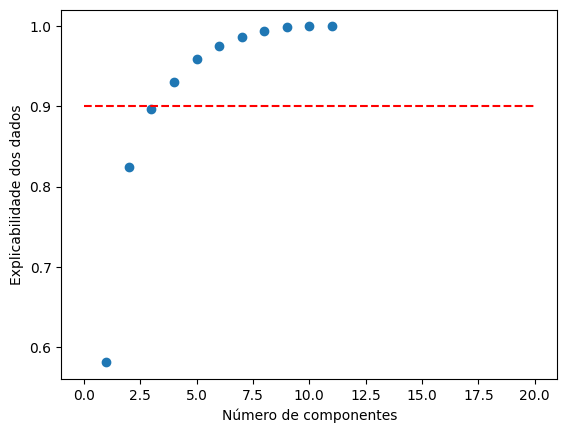

In [376]:
plt.scatter(factors, explainability)
plt.hlines(0.9, 0, 20,'r', linestyle = '--')
plt.xlabel('Número de componentes');
plt.ylabel('Explicabilidade dos dados');

In [377]:
# pca = PCA(n_components = p)
# pca.fit(X)
# x = pca.transform(X)

In [378]:
pcaComponents = pd.DataFrame(pca.components_[0:3].T, columns=['PC1', 'PC2', 'PC3'], index=X.columns)

# abs(pcaComponents)

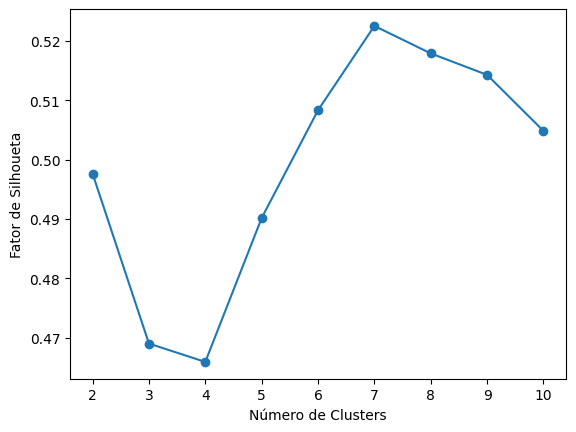

In [379]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples

silHier = []
for n in range(2, 11):
    hier = AgglomerativeClustering(n_clusters=n, linkage='ward')
    labels = hier.fit_predict(scaledNumdS)
    silHier.append(silhouette_score(scaledNumdS, labels))

plt.plot(range(2,11), silHier, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Fator de Silhoueta')
plt.show()

In [380]:
bestNumberClustersHier = list(range(2,11))[np.argmax(silHier)]

In [381]:
aggclust = AgglomerativeClustering(n_clusters=bestNumberClustersHier, linkage='ward').fit(scaledNumdS)
categorias = aggclust.labels_

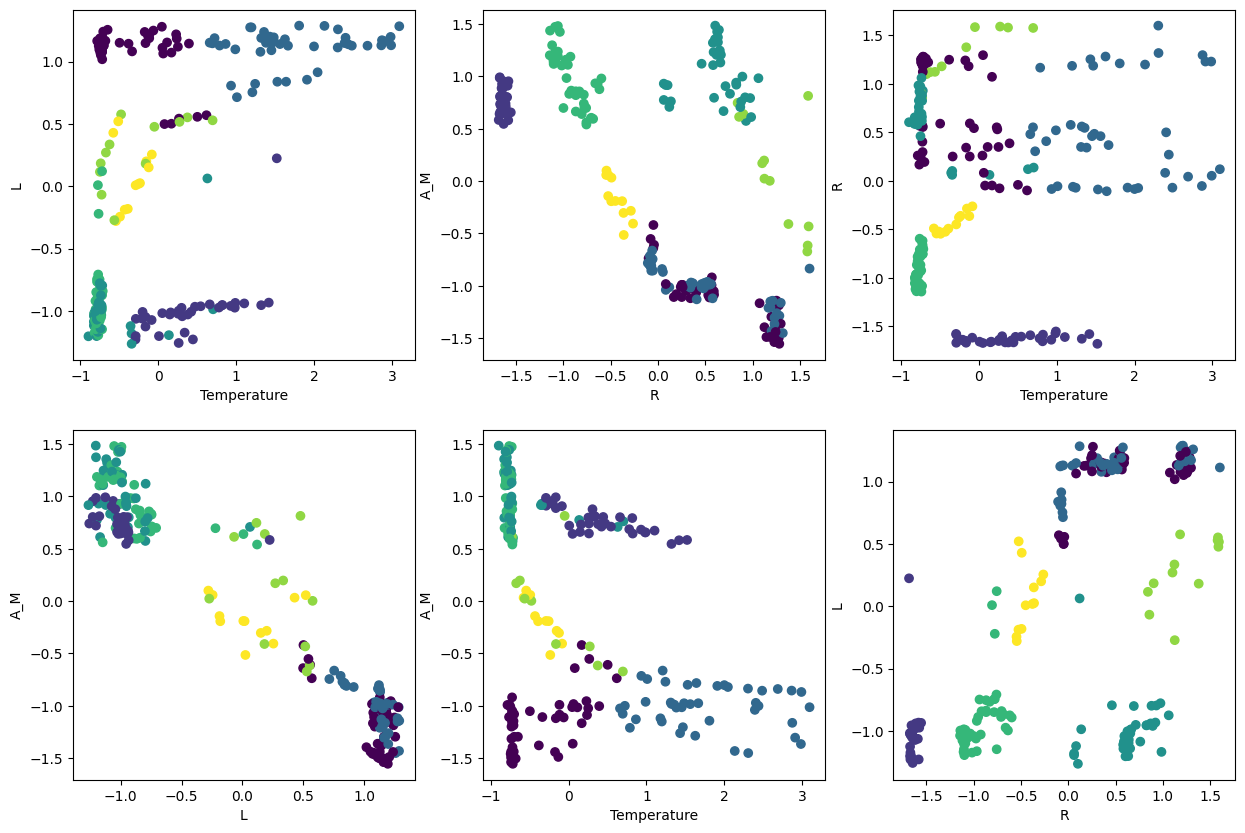

In [382]:
plt.figure(figsize=(15,10))
for i, (xVar, yVar) in enumerate([('Temperature', 'L'), ('R','A_M'), ('Temperature','R'), ('L','A_M'), ('Temperature', 'A_M'), ('R','L')], 1):
    plt.subplot(2,3,i)
    plt.scatter(scaledNumdS[xVar], scaledNumdS[yVar], c=categorias)
    plt.xlabel(xVar)
    plt.ylabel(yVar)

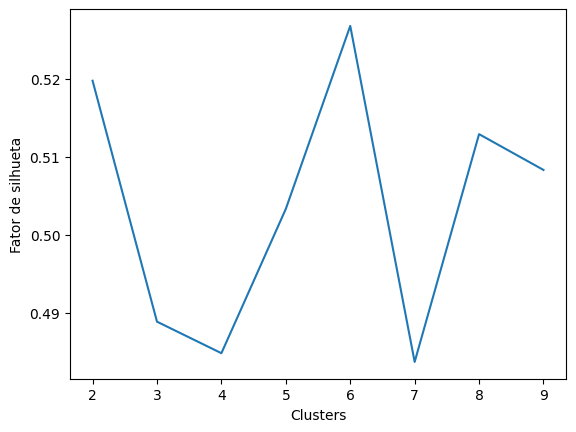

In [383]:
from sklearn.cluster import KMeans

Ns = np.asarray([2, 3, 4, 5, 6, 7, 8, 9])
silhueta_scores = np.zeros(len(Ns))
pontos_bad = np.zeros(len(Ns))

for i,N in enumerate(Ns):
    kmeans = KMeans(n_clusters=N, random_state=2).fit(scaledNumdS) # 14 = 7, 43 = 6 (x) # 2 = 6
    categorias = kmeans.labels_
    silhueta_scores[i] = silhouette_score(scaledNumdS, categorias)
    sample_silhouette_values = silhouette_samples(scaledNumdS, categorias)
    mask = ( sample_silhouette_values < 0 )
    pontos_bad[i] = (100 * mask.sum() / len(mask)).round(2)


plt.plot(Ns,silhueta_scores);
plt.xlabel('Clusters')
plt.ylabel('Fator de silhueta')

# bestNumberClustersKMeans = Ns[(silhueta_scores/pontos_bad).argmax()]
if pontos_bad.all() == 0:
    bestNumberClustersKMeans = Ns[silhueta_scores.argmax()]
else:
    bestNumberClustersKMeans = Ns[(silhueta_scores/pontos_bad).argmax()]

# silKMeans = []
# for n in range(2, 11):
#     kmeans = KMeans(n_clusters=n).fit(scaledNumdS)
#     labels = kmeans.fit_predict(scaledNumdS)
#     silKMeans.append(silhouette_score(scaledNumdS, labels))

# plt.plot(range(2,11), silKMeans, marker='o')
# plt.xlabel('Número de Clusters')
# plt.ylabel('Fator de Silhoueta')
# plt.show()

In [384]:
# bestNumberClustersKMeans = Ns[(silhueta_scores/pontos_bad).argmax()]

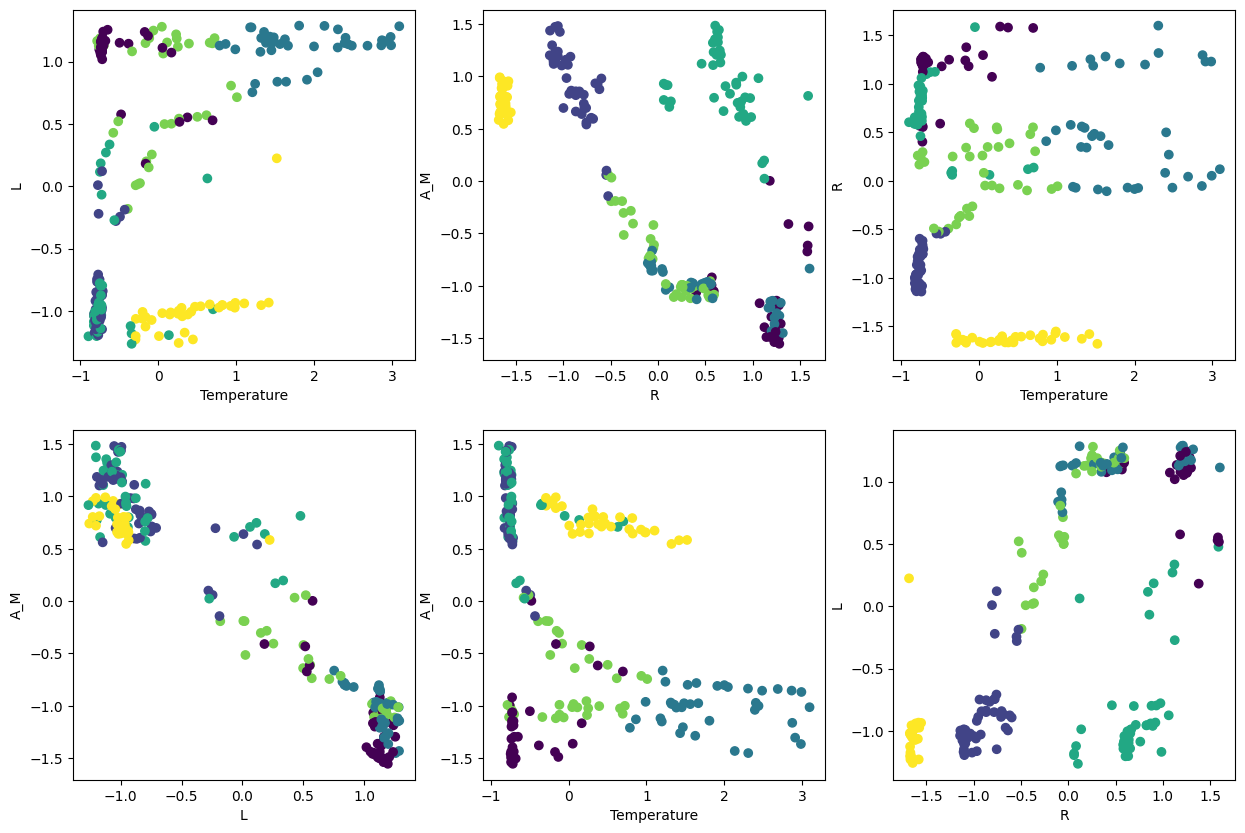

In [385]:
kmeans = KMeans(n_clusters=bestNumberClustersKMeans).fit(scaledNumdS)
categorias = kmeans.labels_

plt.figure(figsize=(15,10))
for i, (xVar, yVar) in enumerate([('Temperature', 'L'), ('R','A_M'), ('Temperature','R'), ('L','A_M'), ('Temperature', 'A_M'), ('R','L')], 1):
  plt.subplot(2,3,i)
  plt.scatter(scaledNumdS[xVar], scaledNumdS[yVar], c=categorias)
  plt.xlabel(xVar)
  plt.ylabel(yVar)

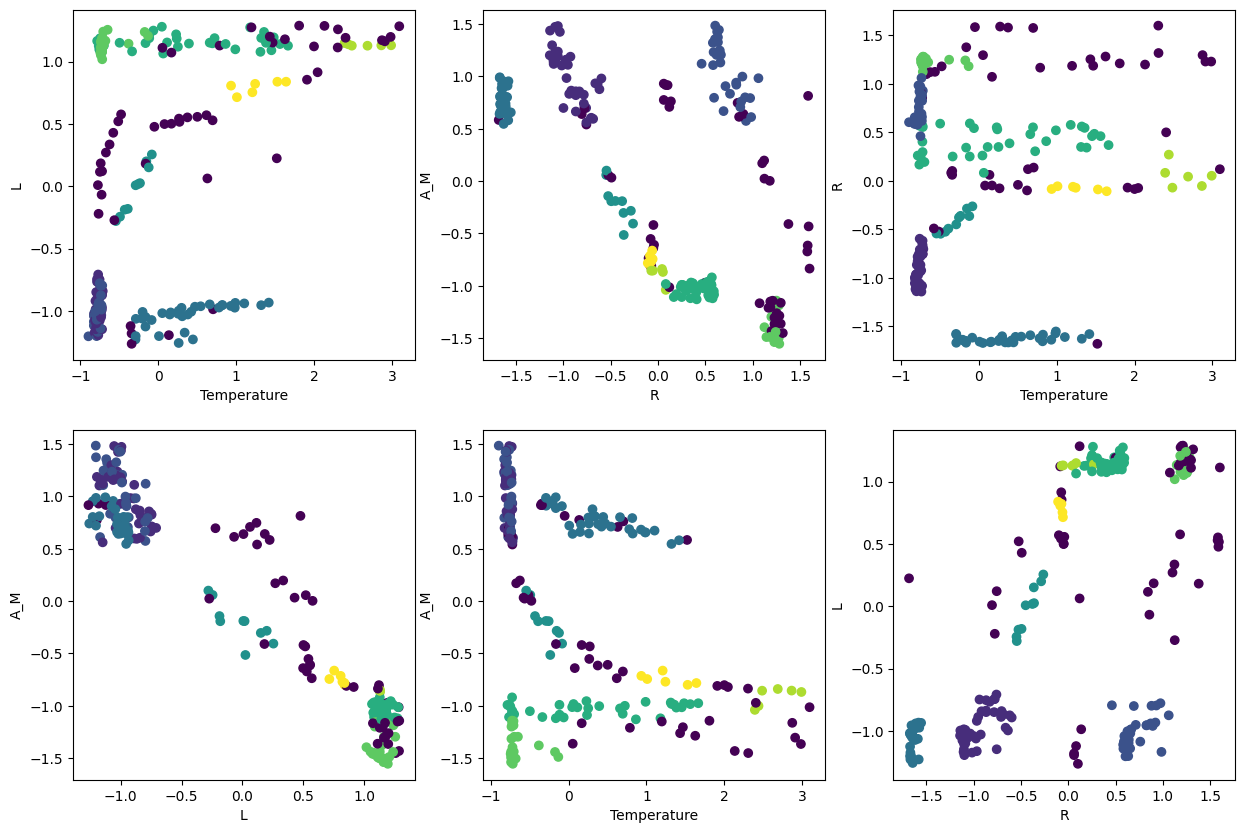

In [390]:
from sklearn.cluster import DBSCAN

epsilon = 0.4
minN = 6

dbscan = DBSCAN(eps=epsilon, min_samples=minN).fit(scaledNumdS)
categorias = dbscan.labels_

plt.figure(figsize=(15,10))
for i, (xVar, yVar) in enumerate([('Temperature', 'L'), ('R','A_M'), ('Temperature','R'), ('L','A_M'), ('Temperature', 'A_M'), ('R','L')], 1):
  plt.subplot(2,3,i)
  plt.scatter(scaledNumdS[xVar], scaledNumdS[yVar], c=categorias)
  plt.xlabel(xVar)
  plt.ylabel(yVar)